Daniel Felipe Tamayo Cortes      1214747121


In [1]:
print("hello")

hello


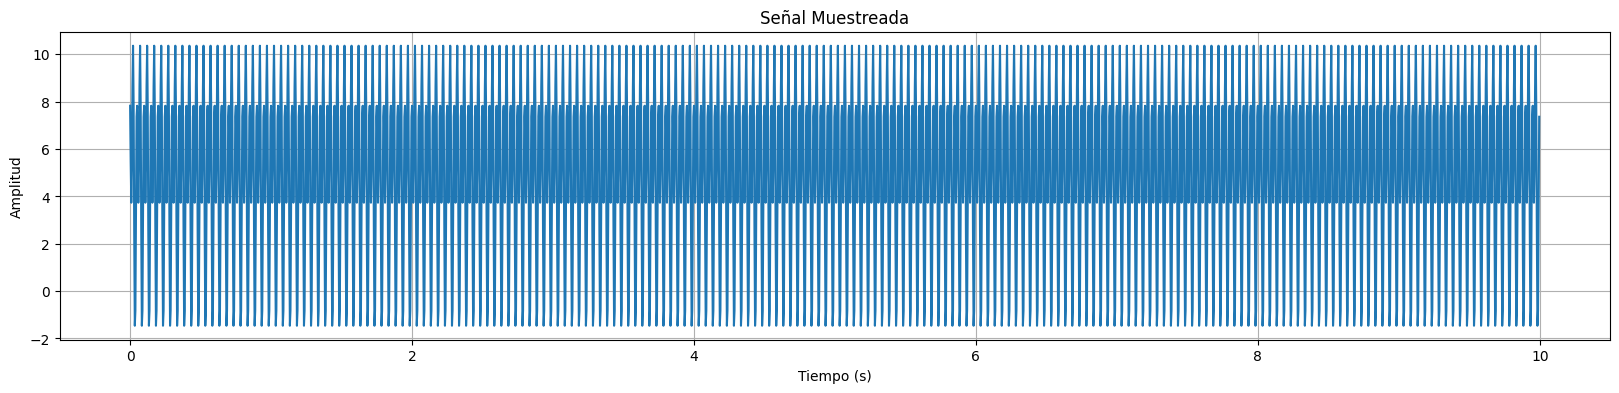

In [15]:
import numpy as np
import matplotlib.pyplot as plt


t_final = 10  # Duración de la señal
a=1
k = 2*a+1 

# Tomando el teorema de muestreo nyquist, la frecuencia de muestreo debe ser mayor a la frecuencia de la señal
# se observa una frecuencia de 40 Hz en el primer término (2*pi*40 = W = 80 --> 40 = f )
# por lo cuál se toma el doble de esta frecuencia, es decir , 80 Hz

fs = 40*2
f_s =  3*fs  # Frecuencia de muestreo empleada para mejorar la resolución, arbitrariamente escogí un factor de 3 veces la frecuencia mínima hallada

t = np.arange(0, t_final, 1/f_s)

x = 4*np.cos(80*np.pi*t + np.pi/4) + k*np.sin(40*np.pi*t) + 5

plt.figure(figsize=(20, 4))
plt.plot(t,x)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal Muestreada')
plt.grid(True)
plt.show()